In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('cars_engage_2022 (2).csv')

In [3]:
cars.head()

,Unnamed: 0,Make,Ex-Showroom_Price,Displacement,Fuel_Tank_Capacity,Fuel_Type,City_Mileage,Type
0,0,Tata Nano Genx Xt,"Rs. 2,92,667",624 cc,24 litres,Petrol,?23.6 km/litre,Manual
1,1,Tata Nano Genx Xe,"Rs. 2,36,447",624 cc,24 litres,Petrol,?23.6 km/litre,Manual
2,2,Tata Nano Genx Emax Xm,"Rs. 2,96,661",624 cc,15 litres,CNG,NaN,Manual
3,3,Tata Nano Genx Xta,"Rs. 3,34,768",624 cc,24 litres,Petrol,?23.6 km/litre,Automatic
4,4,Tata Nano Genx Xm,"Rs. 2,72,223",624 cc,24 litres,Petrol,?23.6 km/litre,Manual


# Data Cleaning

In [4]:
cars.drop(columns= 'Unnamed: 0', inplace = True)

In [5]:
cars['Fuel_Type'].unique()

array(['Petrol', 'CNG', 'Diesel', 'CNG + Petrol', 'Hybrid', 'Electric'],
      dtype=object)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                1276 non-null   object
 1   Ex-Showroom_Price   1276 non-null   object
 2   Displacement        1264 non-null   object
 3   Fuel_Tank_Capacity  1207 non-null   object
 4   Fuel_Type           1276 non-null   object
 5   City_Mileage        721 non-null    object
 6   Type                1275 non-null   object
dtypes: object(7)
memory usage: 69.9+ KB


In [7]:
cars['Type'].unique()

array(['Manual', 'Automatic', 'AMT', 'CVT', 'DCT', nan], dtype=object)

In [8]:
cars['Ex-Showroom_Price'] = [i.replace('Rs. ','') for i in cars['Ex-Showroom_Price']]
cars['Ex-Showroom_Price'] = [i.replace(',','') for i in cars['Ex-Showroom_Price']]
cars['Ex-Showroom_Price'] = cars['Ex-Showroom_Price'].astype(int)

In [9]:
cars['City_Mileage'] = cars['City_Mileage'].astype(str)
cars['City_Mileage'] = [i.replace('km/litre','') for i in cars['City_Mileage']]
cars['City_Mileage'] = [i.replace('?','') for i in cars['City_Mileage']]
cars['City_Mileage'] = [i.replace(',','.') for i in cars['City_Mileage']]
cars['City_Mileage'] = [i.replace('12.5-12.7 ','12.6') for i in cars['City_Mileage']]
cars['City_Mileage'] = cars['City_Mileage'].astype(float)
cars['City_Mileage'] = cars['City_Mileage'].fillna(cars['City_Mileage'].mean())

In [10]:
cars['Displacement'] = cars['Displacement'].astype(str)
cars['Displacement'] = [i.replace(' cc','') for i in cars['Displacement']]
cars.loc[cars['Displacement'].isna(),'Displacement'] = np.nan
cars['Displacement'] = cars['Displacement'].astype(float)
cars['Displacement'] = cars['Displacement'].fillna(cars['Displacement'].mean())

In [11]:
cars['Fuel_Tank_Capacity'] = cars['Fuel_Tank_Capacity'].astype(str)
cars['Fuel_Tank_Capacity'] = [i.replace('litres','') for i in cars['Fuel_Tank_Capacity']]
cars['Fuel_Tank_Capacity'] = cars['Fuel_Tank_Capacity'].astype(float)
cars['Fuel_Tank_Capacity'] = cars['Fuel_Tank_Capacity'].fillna(cars['Fuel_Tank_Capacity'].mean())

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1276 non-null   object 
 1   Ex-Showroom_Price   1276 non-null   int32  
 2   Displacement        1276 non-null   float64
 3   Fuel_Tank_Capacity  1276 non-null   float64
 4   Fuel_Type           1276 non-null   object 
 5   City_Mileage        1276 non-null   float64
 6   Type                1275 non-null   object 
dtypes: float64(3), int32(1), object(3)
memory usage: 64.9+ KB


In [13]:
cars = cars.dropna(subset = ['Type'])

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1275 non-null   object 
 1   Ex-Showroom_Price   1275 non-null   int32  
 2   Displacement        1275 non-null   float64
 3   Fuel_Tank_Capacity  1275 non-null   float64
 4   Fuel_Type           1275 non-null   object 
 5   City_Mileage        1275 non-null   float64
 6   Type                1275 non-null   object 
dtypes: float64(3), int32(1), object(3)
memory usage: 74.7+ KB


In [15]:
cars = cars[cars.Fuel_Type != 'CNG + Petrol']

In [16]:
cars['Type'].unique()

array(['Manual', 'Automatic', 'AMT', 'CVT', 'DCT'], dtype=object)

In [17]:
cars = cars[cars.Type != 'AMT']

In [18]:
cars = cars[cars.Type != 'CVT']

In [19]:
cars = cars[cars.Type != 'DCT']

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1241 non-null   object 
 1   Ex-Showroom_Price   1241 non-null   int32  
 2   Displacement        1241 non-null   float64
 3   Fuel_Tank_Capacity  1241 non-null   float64
 4   Fuel_Type           1241 non-null   object 
 5   City_Mileage        1241 non-null   float64
 6   Type                1241 non-null   object 
dtypes: float64(3), int32(1), object(3)
memory usage: 72.7+ KB


In [21]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Ex-Showroom_Price,1241.0,4.690805e+06,1.230207e+07,236447.0,749192.0,1.089000e+06,3021200.0,212155397.0
Displacement,1241.0,1.874673e+03,1.066690e+03,72.0,1199.0,1.498000e+03,1998.0,7993.0
Fuel_Tank_Capacity,1241.0,5.243101e+01,1.602842e+01,15.0,42.0,5.000000e+01,60.0,105.0
City_Mileage,1241.0,1.579019e+01,6.788893e+00,2.0,14.0,1.581512e+01,16.0,110.0


In [22]:
cars.head()

,Make,Ex-Showroom_Price,Displacement,Fuel_Tank_Capacity,Fuel_Type,City_Mileage,Type
0,Tata Nano Genx Xt,292667,624.0,24.0,Petrol,23.600000,Manual
1,Tata Nano Genx Xe,236447,624.0,24.0,Petrol,23.600000,Manual
2,Tata Nano Genx Emax Xm,296661,624.0,15.0,CNG,15.815121,Manual
3,Tata Nano Genx Xta,334768,624.0,24.0,Petrol,23.600000,Automatic
4,Tata Nano Genx Xm,272223,624.0,24.0,Petrol,23.600000,Manual


In [23]:
cars.drop('Make', axis = 1, inplace = True)

In [24]:
cars = pd.get_dummies(cars, drop_first = True)

In [25]:
cars.head()

,Ex-Showroom_Price,Displacement,Fuel_Tank_Capacity,City_Mileage,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Type_Manual
0,292667,624.0,24.0,23.600000,0,0,0,1,1
1,236447,624.0,24.0,23.600000,0,0,0,1,1
2,296661,624.0,15.0,15.815121,0,0,0,0,1
3,334768,624.0,24.0,23.600000,0,0,0,1,0
4,272223,624.0,24.0,23.600000,0,0,0,1,1


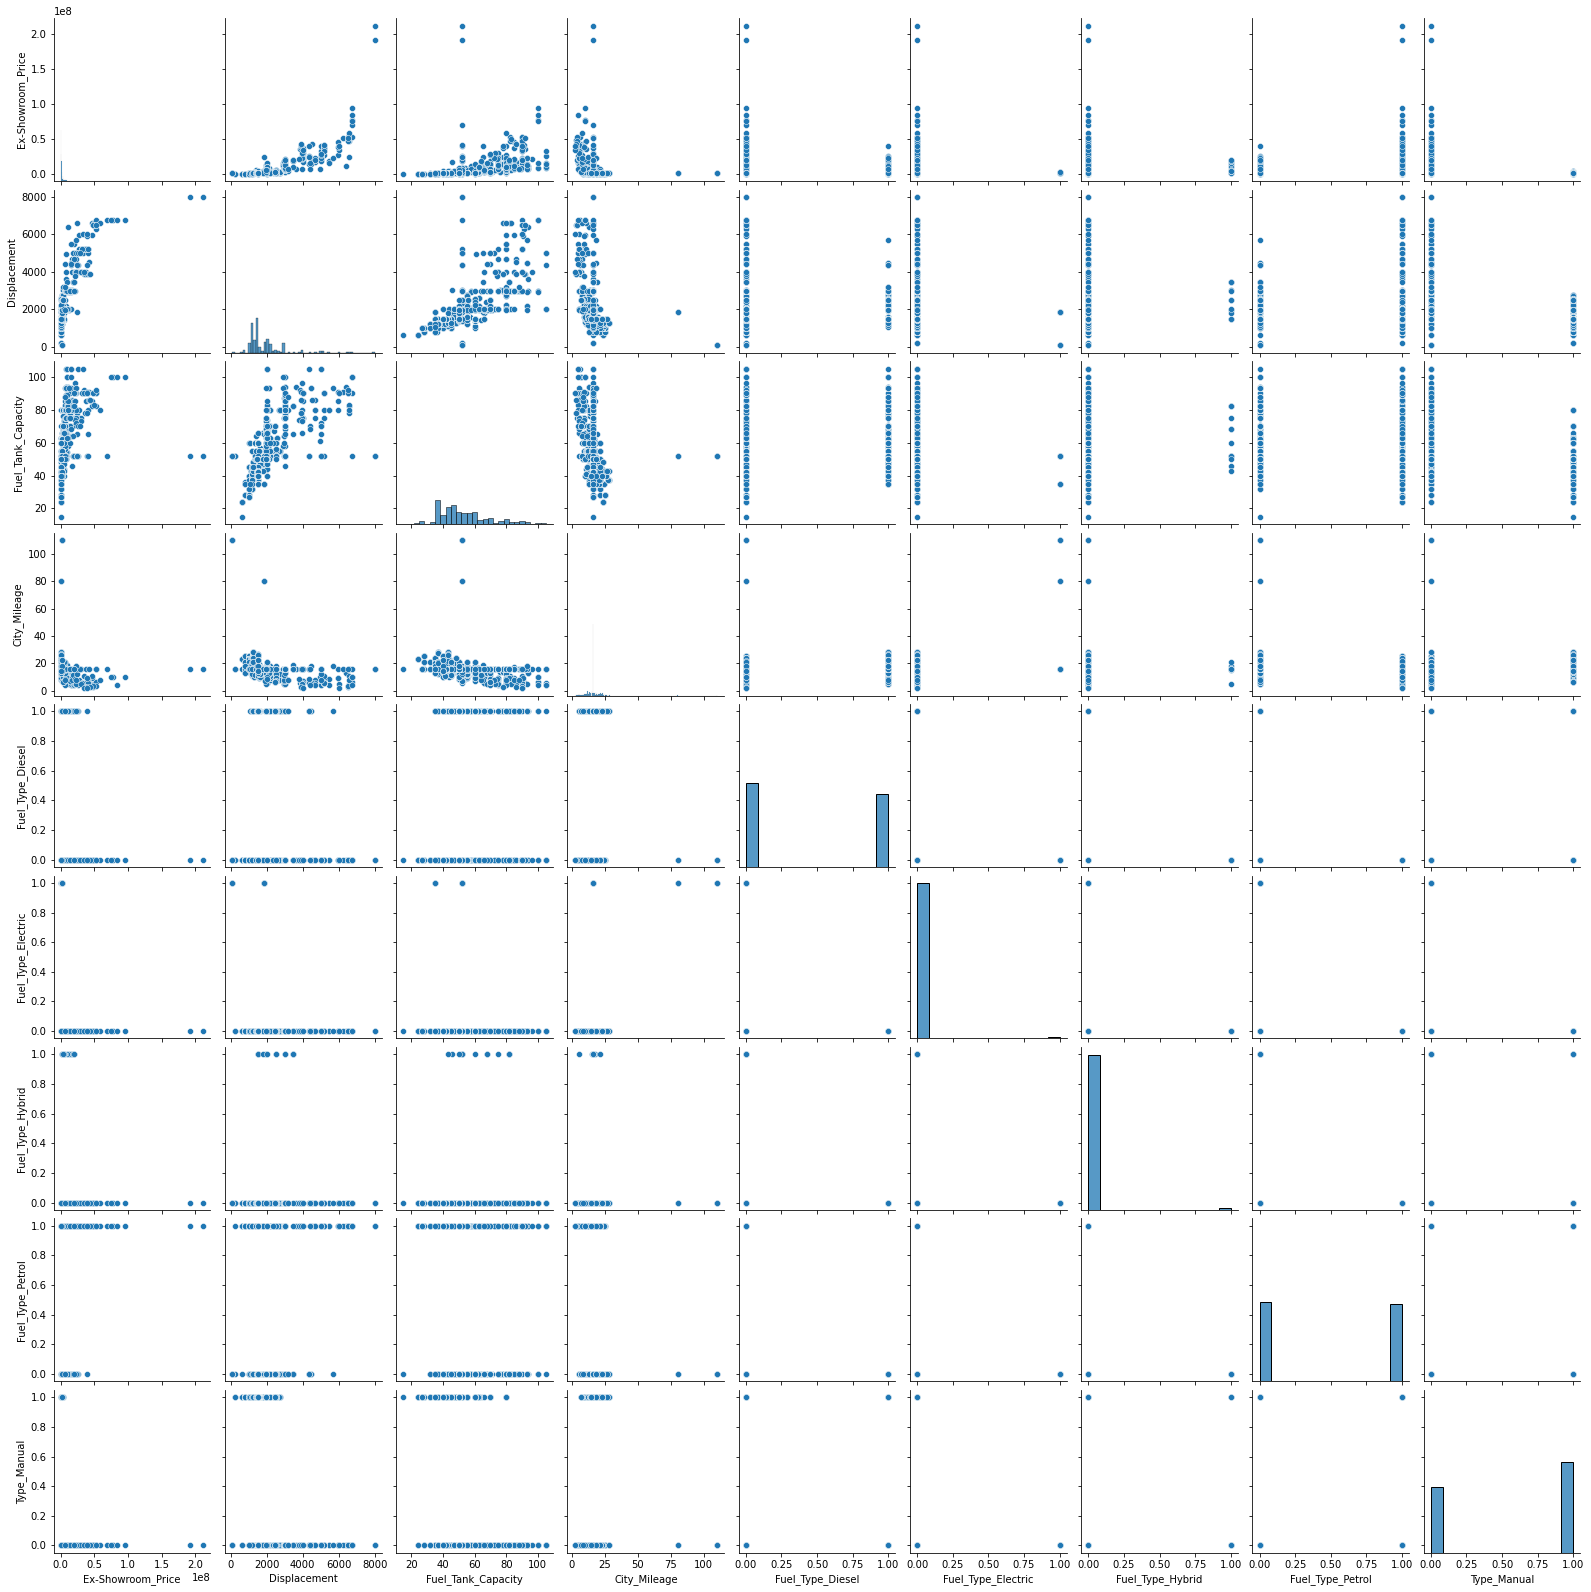

In [26]:
sns.pairplot(cars)

<AxesSubplot:>

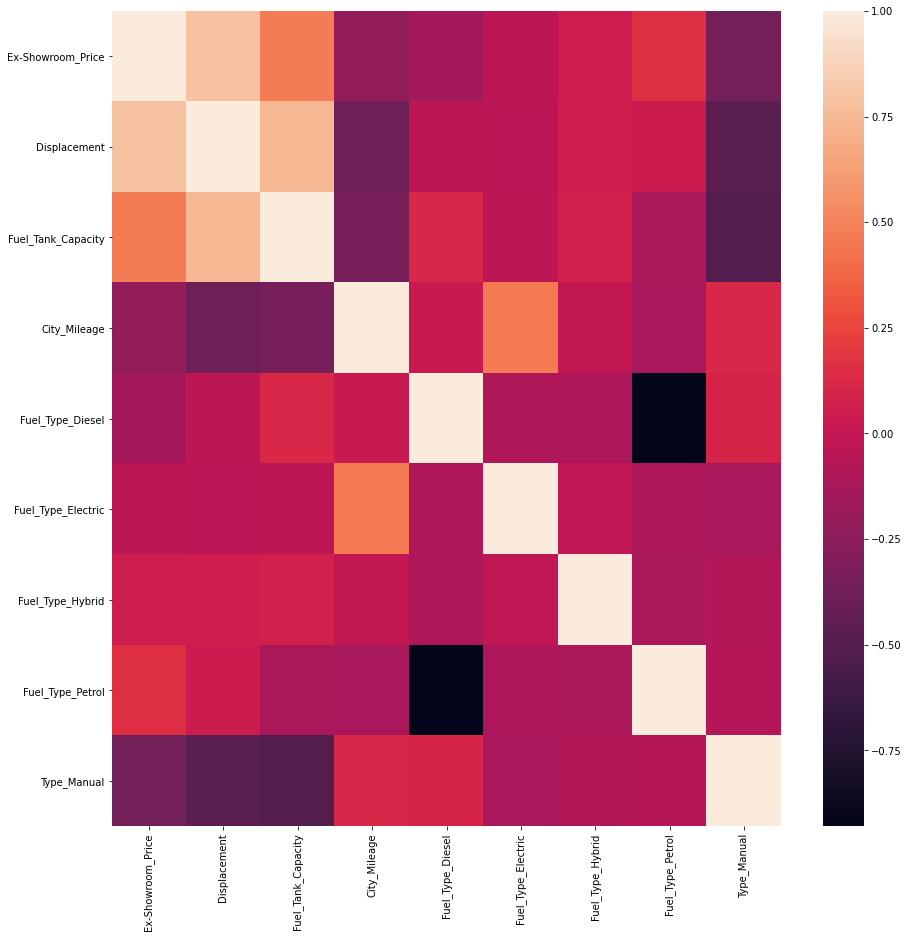

In [27]:
plt.figure(figsize = (15,15))
sns.heatmap(
    cars.corr()
   
)

# Model

In [56]:
X = cars.drop(columns = 'Ex-Showroom_Price')
y = cars['Ex-Showroom_Price']
print(X.shape)
print(y.shape)

(1241, 8)
(1241,)


In [57]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [58]:
model.feature_importances_

array([8.58830546e-01, 7.48145822e-02, 2.09347309e-02, 4.50122518e-03,
       2.83868910e-04, 1.31277201e-03, 5.71410140e-03, 3.36081730e-02])

<AxesSubplot:>

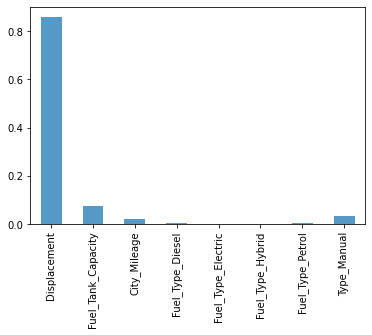

In [59]:
pd.Series(model.feature_importances_, index = X.columns).plot(kind = 'bar', alpha = 0.75, rot = 90)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6254137312943182

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

In [63]:
cross_val_score(LinearRegression(), X,y, cv = cv)

array([0.62541373, 0.69734518, 0.69511917, 0.64203557, 0.76412863])

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [65]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result
perfect_model(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{'normalize': False}, {'splitter': 'best', 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'friedman_mse'}, {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}]


,model,best_score,best_params
0,Linear_Regression,0.617649,{'normalize': False}
1,Decision_Tree,0.810453,"{'splitter': 'best', 'min_samples_leaf': 2, 'm..."
2,Random_forest,0.825554,"{'n_estimators': 80, 'min_samples_split': 2, '..."


In [66]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae')
final_dec_model.fit(X_train,y_train)
final_dec_model.score(X_test,y_test)

0.8793396488776696

In [67]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
final_rf_model.fit(X_train,y_train)
final_rf_model.score(X_test,y_test)

0.8988035742926648

In [68]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

array([0.87625721, 0.87244875, 0.80806185, 0.68248565, 0.87740072])

In [69]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

array([0.89646911, 0.92233016, 0.87030154, 0.79507829, 0.89516022])

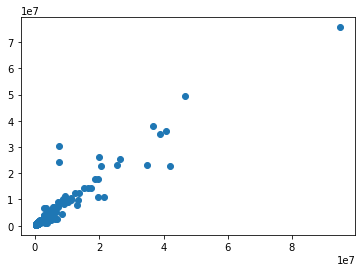

In [70]:
predictions=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions)

In [71]:
import pickle
with open('RF_price_predicting_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(final_rf_model, file)

In [72]:
X_test

,Displacement,Fuel_Tank_Capacity,City_Mileage,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Type_Manual
1065,1197.0,37.0,15.815121,0,0,0,1,1
134,1197.0,37.0,15.815121,0,0,0,1,1
195,1498.0,40.0,15.815121,1,0,0,0,1
794,2987.0,80.0,7.450000,1,0,0,0,0
18,999.0,28.0,25.170000,0,0,0,1,0
...,...,...,...,...,...,...,...,...
934,1462.0,45.0,15.815121,0,0,0,1,0
170,1194.0,42.0,15.815121,0,0,0,1,1
955,1493.0,60.0,18.490000,1,0,0,0,1
1240,1968.0,50.0,15.815121,1,0,0,0,1


In [73]:
final_rf_model.predict(pd.DataFrame([[1197,37,15,0,1,0,0,1]], columns =['Displacement', 'Fuel_Tank_Capacity','City_Mileage', 'Fuel_Type_Diesel', 'Fuel_Type_Electric','Fuel_Type_Hybrid','Fuel_Type_Petrol', 'Type_Manual']))

array([678786.0386117])

In [74]:
y_test

1065     643350
134      655900
195      842400
794     7285332
18       463290
         ...   
934     1013000
170      591400
955     1055259
1240    1799599
993     1479574
Name: Ex-Showroom_Price, Length: 249, dtype: int32